In [1]:
from scipy import signal
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
sig_len_sec = 2
Fs = 100
T = 1/Fs
N = Fs * sig_len_sec
tt = np.arange(0, N) * T - (N/2 * T)

In [3]:
ff = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N, endpoint=False)

In [4]:
# Create a Frequency Mask, extending into negative frequency domain
mask = np.ones(len(tt))
mask[130::] = 0
mask[0:70] = 0

<IPython.core.display.Javascript object>


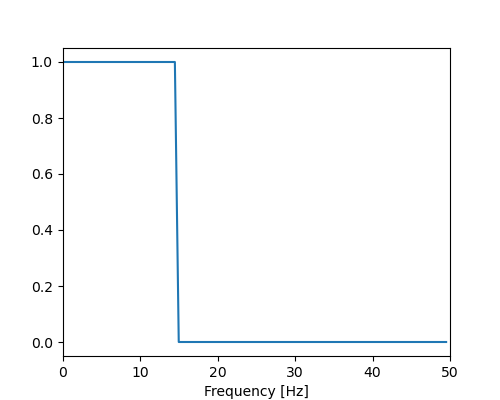

Text(0.5, 0, 'Frequency [Hz]')

In [5]:
f = plt.figure(figsize=(5, 4))
ax = f.add_subplot(111)

ax.plot(ff, mask)

ax.set_xlim([0, Fs/2]) # zoom in on positive frequencies only
ax.set_xlabel('Frequency [Hz]')

In [6]:
y_mask = np.real(np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(mask))))

<IPython.core.display.Javascript object>


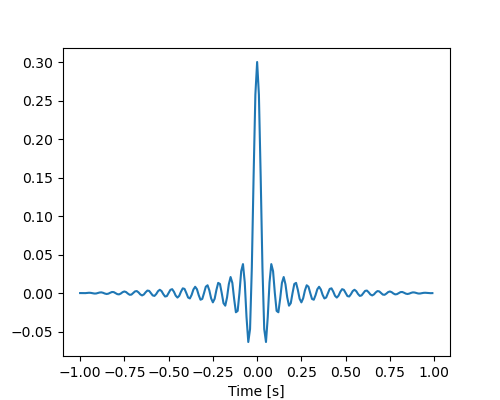

Text(0.5, 0, 'Time [s]')

In [7]:
f = plt.figure(figsize=(5, 4))
ax = f.add_subplot(111)

ax.plot(tt, y_mask, label='y_mask')

# ax.legend()
ax.set_xlabel('Time [s]')

In [8]:
np.sum(y_mask)

1.0

In [9]:
fc = 15
y_sync = np.sin(2 * np.pi * fc * tt)/(2 * np.pi * fc * tt)

<ipython-input-9-784f030103f4>:2: RuntimeWarning: invalid value encountered in true_divide
  y_sync = np.sin(2 * np.pi * fc * tt)/(2 * np.pi * fc * tt)


In [10]:
y_sync[int(N/2)] = 1 # the value at x = 0 is defined to be the limiting value 

<IPython.core.display.Javascript object>


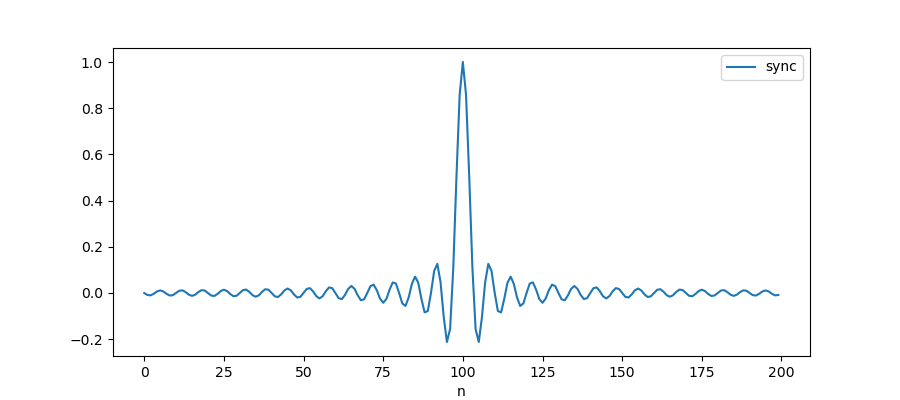

Text(0.5, 0, 'n')

In [11]:
f = plt.figure(figsize=(9, 4))
ax = f.add_subplot(111)

ax.plot(y_sync, label='sync')

ax.legend()
ax.set_xlabel('n')

In [12]:
np.sum(y_sync)

3.3125144340097012

In [13]:
f1 = 2
y1 = np.sin(2 * np.pi * f1 * tt)

In [14]:
f2 = 20
y2 = 0.25 * np.sin(2 * np.pi * f2 * tt)

In [15]:
y3 = y1 + y2

In [16]:
y3_padded = np.hstack([y3, np.zeros(len(y3))])

<IPython.core.display.Javascript object>


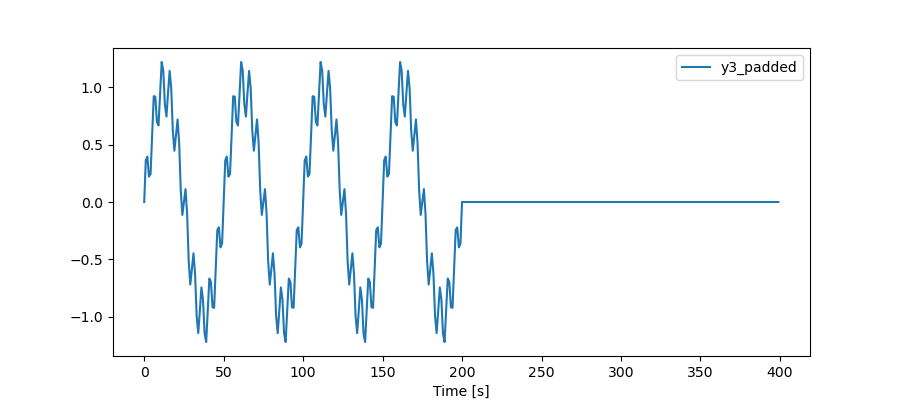

Text(0.5, 0, 'Time [s]')

In [17]:
f = plt.figure(figsize=(9, 4))
ax = f.add_subplot(111)

ax.plot(y3_padded, label='y3_padded')

ax.legend()
ax.set_xlabel('Time [s]')

In [18]:
def fir_filter(b, xx):
    yy = np.zeros_like(xx)  # create buffer for output values
    delay = np.zeros_like(b)  # create delay line
    
    for ii, x in enumerate(xx):
        delay[1:] = delay[:-1]  # right-shift values in 'delay'
        delay[:1] = x  # place new value into the delay line
        yy[ii] = np.sum(delay * b)
    
    return yy

In [19]:
y3_filt = fir_filter(y_mask, y3_padded)

<IPython.core.display.Javascript object>


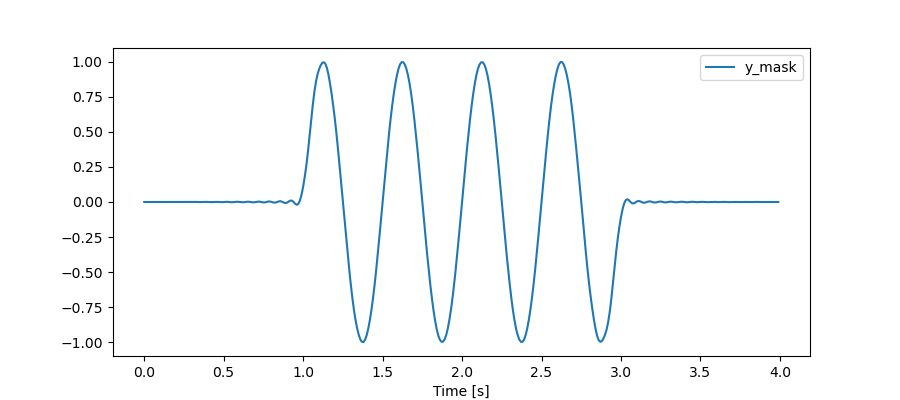

Text(0.5, 0, 'Time [s]')

In [20]:
f = plt.figure(figsize=(9, 4))
ax = f.add_subplot(111)

ax.plot(T * np.arange(len(y3_filt)), y3_filt, label='y_mask')

ax.legend()
ax.set_xlabel('Time [s]')

In [21]:
y3_filt2 = fir_filter(y_sync/np.sum(y_sync), y3_padded)

<IPython.core.display.Javascript object>


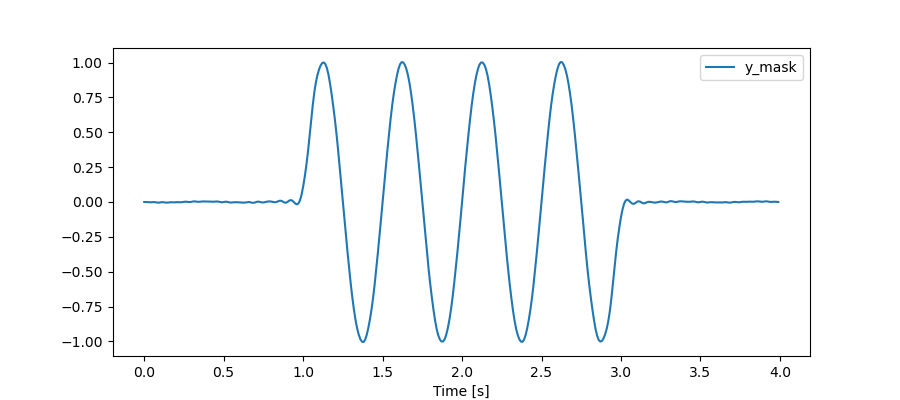

Text(0.5, 0, 'Time [s]')

In [22]:
f = plt.figure(figsize=(9, 4))
ax = f.add_subplot(111)

ax.plot(T * np.arange(len(y3_filt2)), y3_filt2, label='y_mask')

ax.legend()
ax.set_xlabel('Time [s]')

<IPython.core.display.Javascript object>


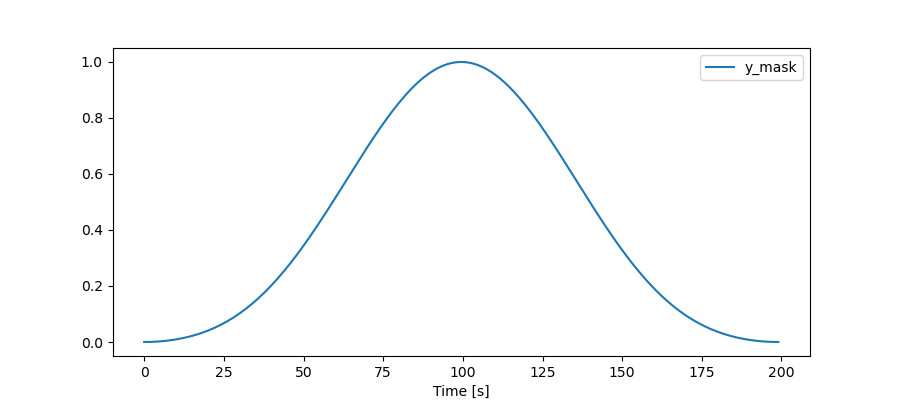

Text(0.5, 0, 'Time [s]')

In [23]:
f = plt.figure(figsize=(9, 4))
ax = f.add_subplot(111)

ax.plot(np.blackman(len(y_sync)), label='y_mask')

ax.legend()
ax.set_xlabel('Time [s]')

In [24]:
y3_filt3 = fir_filter(y_sync/np.sum(y_sync) * np.blackman(len(y_sync)), y3_padded)

<IPython.core.display.Javascript object>


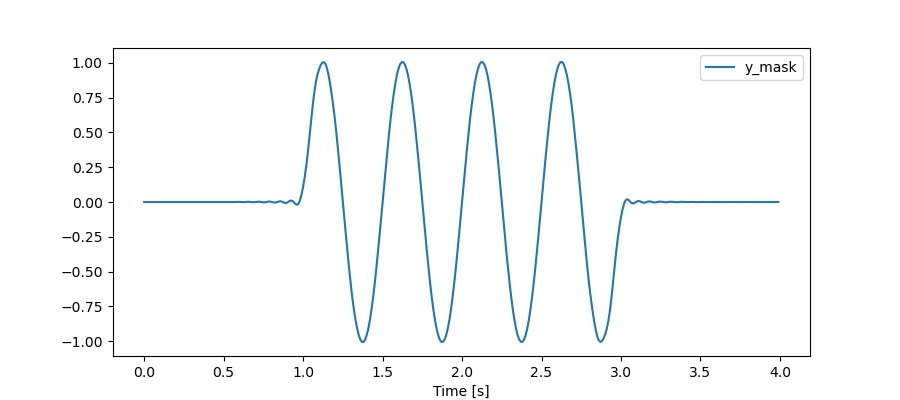

Text(0.5, 0, 'Time [s]')

In [25]:
f = plt.figure(figsize=(9, 4))
ax = f.add_subplot(111)

ax.plot(T * np.arange(len(y3_filt3)), y3_filt3, label='y_mask')

ax.legend()
ax.set_xlabel('Time [s]')

In [26]:
from scipy.signal import freqz

# Calculate the frequency response 'h' at the complex frequencies 'w'
# Note that 'w' is returned in the same units as 'Fs'
w, h = freqz(y_mask, [1], worN=8192)

w_hz = w * (Fs/(2*np.pi)) # 'convert 'w' from radians to Hz
h_db = 20 * np.log10(np.abs(h)) # convert 'h' from complex magitude to dB
angles = np.unwrap(np.angle(h)) * (180/np.pi)

<IPython.core.display.Javascript object>


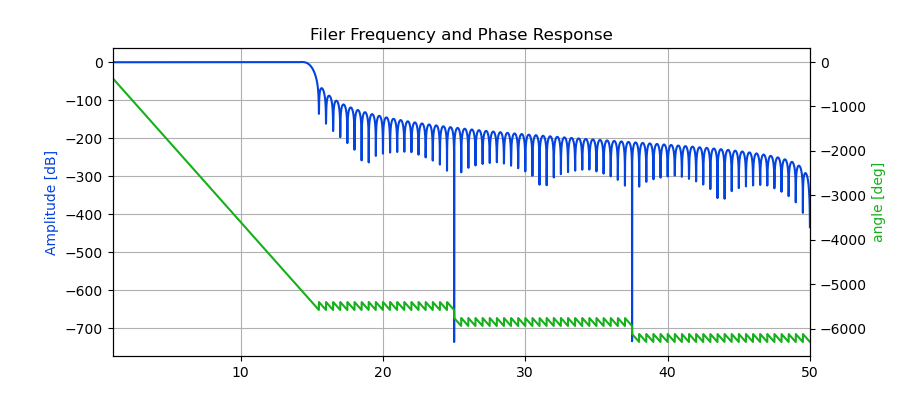

Text(0, 0.5, 'angle [deg]')

In [27]:
f = plt.figure(figsize=(9, 4))
ax1 = f.add_subplot(111)

ax1.plot(w_hz, 20*np.log(np.abs(h)), color='xkcd:blue')

# ax1.set_xscale('log')
ax1.set_xlim([1, Fs/2])
ax1.grid(which='both', axis='both')
ax1.set_ylabel('Amplitude [dB]', color='xkcd:blue')
ax1.set_title('Filer Frequency and Phase Response')

ax2 = ax1.twinx()
ax2.plot(w_hz, angles, color='xkcd:green')
ax2.set_ylabel('angle [deg]', color='xkcd:green')